# Merkle Sokrati : Assignment on DecisionTree

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data= pd.read_csv(r'C:\Users\user-pc\merkle sokrati\sample_user_data.csv', header=0)

In [3]:
#displaying top 5 data
data.head(5)

,fullVisitorId,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
0,2.740000e+13,1,20170211,1486866293,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Organic Search
1,3.950000e+13,1,20170327,1490629516,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Social
2,4.090000e+13,1,20170211,1486836571,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
3,4.090000e+13,2,20170211,1486838824,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Oakland,Paid Search
4,6.230000e+13,1,20170709,1499645960,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,not available in demo dataset,Affiliates


# Exploratory Data Analysis

In [4]:
#no of columns
print( 'The no of columns are {} which are {}.'.format(len(data.columns), list(data.columns)))

The no of columns are 17 which are ['fullVisitorId', 'visitNumber', 'date', 'visitStartTime', 'totals_bounces', 'totals_pageviews', 'totals_timeOnSite', 'totals_totalTransactionRevenue', 'totals_transactions', 'trafficSource_source', 'trafficSource_medium', 'trafficSource_campaign', 'device_deviceCategory', 'device_operatingSystem', 'device_mobileDeviceModel', 'geoNetwork_city', 'channelGrouping'].


In [5]:
#shape of data and no of rows in data
print(data.shape)
print('The no of rows of data are {}'.format(data.shape[0]))

(464704, 17)
The no of rows of data are 464704


In [6]:
#datatype of the columns of data
print(data.dtypes)

fullVisitorId                     float64
visitNumber                         int64
date                                int64
visitStartTime                      int64
totals_bounces                    float64
totals_pageviews                  float64
totals_timeOnSite                 float64
totals_totalTransactionRevenue    float64
totals_transactions               float64
trafficSource_source               object
trafficSource_medium               object
trafficSource_campaign             object
device_deviceCategory              object
device_operatingSystem             object
device_mobileDeviceModel           object
geoNetwork_city                    object
channelGrouping                    object
dtype: object


In [7]:
#Statistics on data
data.describe(include='all')

,fullVisitorId,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
count,4.647040e+05,464704.000000,4.647040e+05,4.647040e+05,232372.0,464652.000000,231683.000000,6.308000e+03,6308.000000,464704,464704,464704,464704,464704,464704,464704,464704
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223,7,7,3,18,1,436,8
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(direct),(none),(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187281,187279,446593,312965,171261,464704,268369,233089
mean,4.502944e+18,2.333767,2.017042e+07,1.492482e+09,1.0,3.770607,279.874622,1.617053e+08,1.046449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.074884e+18,9.877242,2.006409e+02,5.279251e+06,0.0,6.402036,492.253792,9.034953e+08,0.531457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.670000e+13,1.000000,2.017010e+07,1.483258e+09,1.0,1.000000,1.000000,2.200000e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.580000e+18,1.000000,2.017022e+07,1.487894e+09,1.0,1.000000,33.000000,2.899000e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.380000e+18,1.000000,2.017042e+07,1.492438e+09,1.0,1.000000,94.000000,5.297500e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.200000e+18,1.000000,2.017061e+07,1.497071e+09,1.0,4.000000,290.000000,1.119375e+08,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#missing data
data.isna().sum()

fullVisitorId                          0
visitNumber                            0
date                                   0
visitStartTime                         0
totals_bounces                    232332
totals_pageviews                      52
totals_timeOnSite                 233021
totals_totalTransactionRevenue    458396
totals_transactions               458396
trafficSource_source                   0
trafficSource_medium                   0
trafficSource_campaign                 0
device_deviceCategory                  0
device_operatingSystem                 0
device_mobileDeviceModel               0
geoNetwork_city                        0
channelGrouping                        0
dtype: int64

# Missing value treatment

Since there are 4 missing values we will treat them based on the domain expertise.

In [9]:
#1. total_bounces
#For data where total bounces = null means that the customer has not bounced and has bought products.
#So we will replace null values with 0

data.loc[data['totals_bounces'].isna()==True, 'totals_bounces']=0
#converting datatype to int
data['totals_bounces']= data['totals_bounces'].astype('int64')

In [10]:
#2. totals_pageviews
#For totals_pageviews we will replace it with the mean data
data['totals_pageviews'].mean()
data.loc[data['totals_pageviews'].isna()==True, 'totals_pageviews']=4

In [11]:
#converting datatype of totals_pageviews to int
data['totals_pageviews']= data['totals_pageviews'].astype('int')

In [12]:
#3. totals_timeOnSite
#For data where totals_timeOnSite = null means that the customer has spent very less time on site and hasnot used the storefront.
#So we will replace null values with 0 sec
data.loc[data['totals_timeOnSite'].isna()==True, 'totals_timeOnSite']=0
data['totals_timeOnSite']= data['totals_timeOnSite'].astype('int64')

In [13]:
#4. totals_totalTransactionRevenue 
#For data where totals_totalTransactionRevenue= null means that the customer has not spent any money.
#So we will replace null values with 0
data.loc[data['totals_totalTransactionRevenue'].isna()==True, 'totals_totalTransactionRevenue']=0
data['totals_totalTransactionRevenue']= data['totals_totalTransactionRevenue'].astype('int64')
data['totals_totalTransactionRevenue']= data['totals_totalTransactionRevenue']/1000000

In [14]:
#5. totals_transactions 
#For data where totals_transactions = null means that the customer done no transaction
#So we will replace null values with 0 sec
data.loc[data['totals_transactions'].isna()==True, 'totals_transactions']=0
data['totals_transactions']= data['totals_transactions'].astype('int64')

# Univariate Analysis

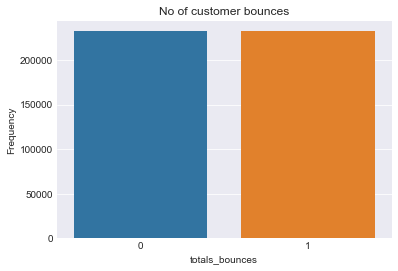

1    232372
0    232332
Name: totals_bounces, dtype: int64

In [15]:
#totals_bounces
#countplot
sns.set_style(style='darkgrid')
sns.countplot(data['totals_bounces'])
plt.xlabel('totals_bounces')
plt.ylabel('Frequency')
plt.title('No of customer bounces')
plt.show()

#value counts for total_bounces
data['totals_bounces'].value_counts()

In [16]:
#totals_bounces
#Checking the total page views for bounce customers
print(data.loc[data['totals_bounces']==1, 'totals_pageviews'].value_counts())
#Checking if bounce customer has bought any product or not. So all the bounce customer has not made any transactions.
data.loc[data['totals_bounces']==1, 'totals_transactions'].value_counts()

1    232372
Name: totals_pageviews, dtype: int64


0    232372
Name: totals_transactions, dtype: int64

*Conclusion-*
1. 1 represents that customer has bounced and 0 rep that customer use the website
2. Around 50 percent of people come to first page and then goes back. People of this kind mostly bounces.
3. 232372 customer bounces out of 464704. So these people wont give me the sale.
4. We can remove all these bounce customers as we are sure that they will not buy the products. But now lets keep them.

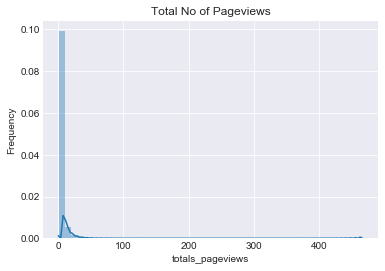

1    233176
2     66561
3     40524
4     25532
5     18567
Name: totals_pageviews, dtype: int64

In [17]:
#totals_pageviews
#distplot for totals_pageviews
sns.set_style(style='darkgrid')
sns.distplot(data['totals_pageviews'])
plt.xlabel('totals_pageviews')
plt.ylabel('Frequency')
plt.title('Total No of Pageviews')
plt.show()
#value counts for totals_pageviews
data['totals_pageviews'].value_counts().head()

*Conclusion-*
1. We have a large proportion of customers(around 50 percent) who have total pageviews = 1 
2. The distrbution here follow 80 - 20 rule.

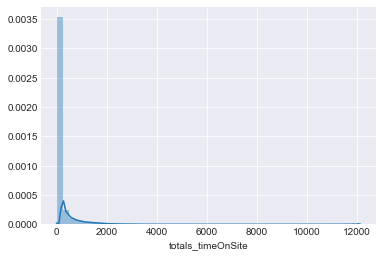

no of times when totals_timeOnSite = 0 is 233021


In [18]:
#totals_timeOnSite
sns.distplot(data['totals_timeOnSite'], )
plt.show()

#no of times when totals_timeOnSite = 0
print('no of times when totals_timeOnSite = 0 is {}'.format((data['totals_timeOnSite']==0).sum()))

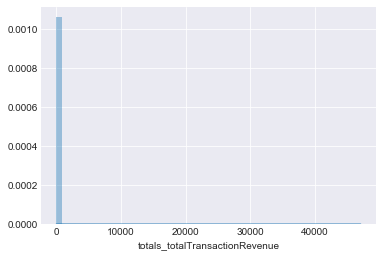

no of times when totals_totalTransactionRevenue = 0 is 458396


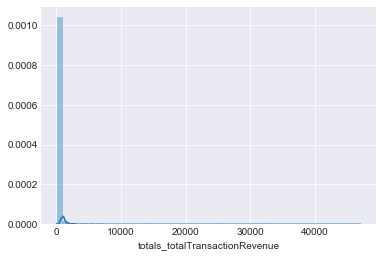

In [19]:
#totals_totalTransactionRevenue
sns.distplot(data['totals_totalTransactionRevenue'], )
plt.show()

#totals_totalTransactionRevenue = 0
print('no of times when totals_totalTransactionRevenue = 0 is {}'.format((data['totals_totalTransactionRevenue']==0).sum()))

#checking the distplot when totals_totalTransactionRevenue <> 0
a=(data.loc[data['totals_totalTransactionRevenue']!=0]['totals_totalTransactionRevenue'])
sns.distplot(a)
plt.show()

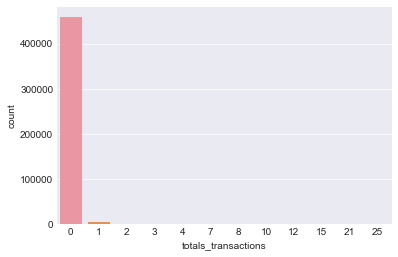

In [20]:
#countplot for totals_transactions
sns.countplot(data['totals_transactions'])

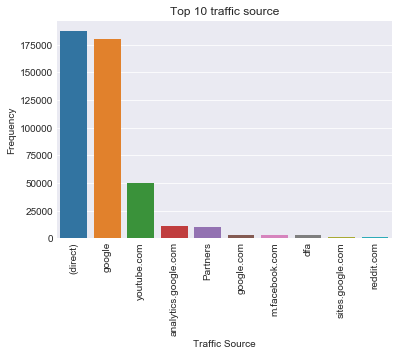

In [21]:
#trafficSource_source
data['trafficSource_source'].value_counts().head(10)

#countplot
sns.set_style(style='darkgrid')
sns.barplot(data['trafficSource_source'].value_counts().head(10).index, data['trafficSource_source'].value_counts().head(10).values)
plt.xlabel('Traffic Source')
plt.ylabel('Frequency')
plt.title('Top 10 traffic source')
plt.xticks(rotation = 90)
plt.show()

(none)       187279
organic      173418
referral      81710
affiliate      9709
cpc            9265
cpm            3211
(not set)       112
Name: trafficSource_medium, dtype: int64


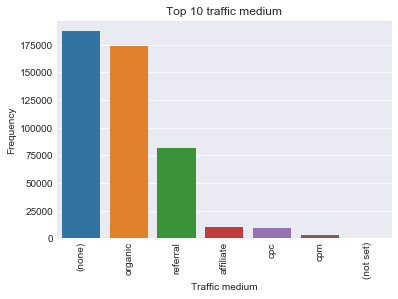

In [22]:
#trafficSource_medium
print(data['trafficSource_medium'].value_counts().head(10))
#countplot
sns.set_style(style='darkgrid')
sns.barplot(data['trafficSource_medium'].value_counts().head(10).index, data['trafficSource_medium'].value_counts().head(10).values)
plt.xlabel('Traffic medium')
plt.ylabel('Frequency')
plt.title('Top 10 traffic medium')
plt.xticks(rotation = 90)
plt.show()

(not set)                             446593
Data Share Promo                        9709
AW - Accessories                        5318
AW - Dynamic Search Ads Whole Site      3048
AW - Apparel                              32
AW - Electronics                           3
Data Share                                 1
Name: trafficSource_campaign, dtype: int64


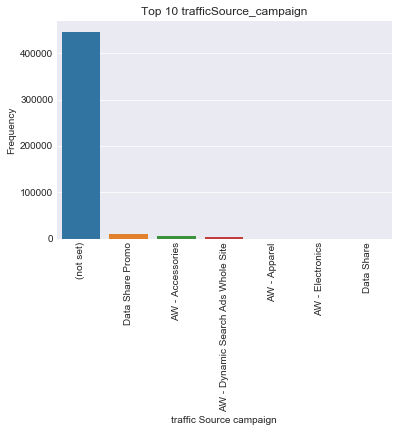

In [23]:
#trafficSource_campaign
print(data['trafficSource_campaign'].value_counts().head(10))
#countplot
sns.set_style(style='darkgrid')
sns.barplot(data['trafficSource_campaign'].value_counts().head(10).index, data['trafficSource_campaign'].value_counts().head(10).values)
plt.xlabel('traffic Source campaign')
plt.ylabel('Frequency')
plt.title('Top 10 trafficSource_campaign')
plt.xticks(rotation = 90)
plt.show()

desktop    312965
mobile     133307
tablet      18432
Name: device_deviceCategory, dtype: int64


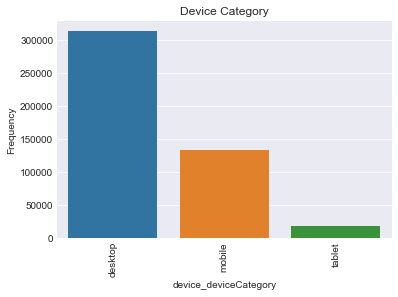

In [24]:
#device_deviceCategory
print(data['device_deviceCategory'].value_counts())
#countplot
sns.set_style(style='darkgrid')
sns.barplot(data['device_deviceCategory'].value_counts().index, data['device_deviceCategory'].value_counts().values)
plt.xlabel('device_deviceCategory')
plt.ylabel('Frequency')
plt.title('Device Category')
plt.xticks(rotation = 90)
plt.show()

Windows          171261
Macintosh        107310
Android           78294
iOS               69145
Linux             19347
Chrome OS         15482
(not set)          2798
Windows Phone       624
Samsung             186
BlackBerry          112
Nintendo WiiU        35
Xbox                 34
Nintendo Wii         33
Firefox OS           32
FreeBSD               7
OpenBSD               2
Nintendo 3DS          1
NTT DoCoMo            1
Name: device_operatingSystem, dtype: int64


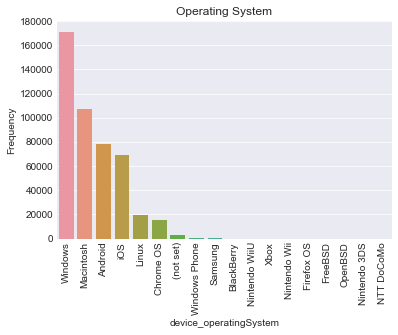

In [25]:
#device_operatingSystem
print(data['device_operatingSystem'].value_counts())
#countplot
sns.set_style(style='darkgrid')
sns.barplot(data['device_operatingSystem'].value_counts().index, data['device_operatingSystem'].value_counts().values)
plt.xlabel('device_operatingSystem')
plt.ylabel('Frequency')
plt.title('Operating System')
plt.xticks(rotation = 90)
plt.show()

In [26]:
#device_mobileDeviceModel
print(data['device_mobileDeviceModel'].value_counts())

not available in demo dataset    464704
Name: device_mobileDeviceModel, dtype: int64


not available in demo dataset    268369
Mountain View                     21564
(not set)                         16321
New York                          14588
San Francisco                     11456
Name: geoNetwork_city, dtype: int64


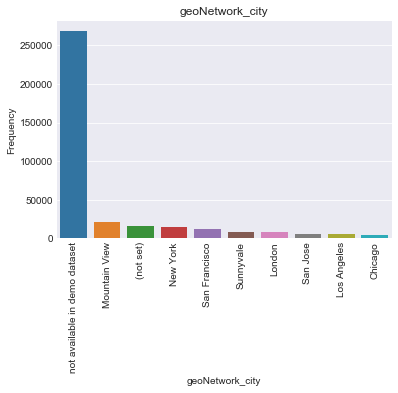

In [27]:
#geoNetwork_city
print(data['geoNetwork_city'].value_counts().head())
#countplot
sns.set_style(style='darkgrid')
sns.barplot(data['geoNetwork_city'].value_counts().head(10).index, data['geoNetwork_city'].value_counts().head(10).values)
plt.xlabel('geoNetwork_city')
plt.ylabel('Frequency')
plt.title('geoNetwork_city')
plt.xticks(rotation = 90)
plt.show()

Organic Search    233089
Direct             86029
Social             59923
Referral           58395
Paid Search        14180
Name: channelGrouping, dtype: int64


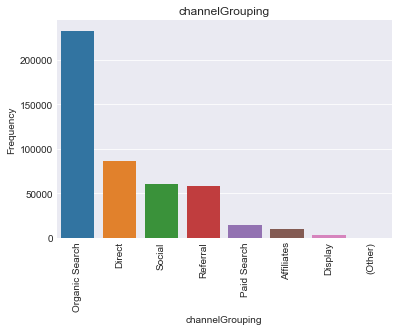

In [28]:
#channelGrouping
print(data['channelGrouping'].value_counts().head())
#countplot
sns.set_style(style='darkgrid')
sns.barplot(data['channelGrouping'].value_counts().head(10).index, data['channelGrouping'].value_counts().head(10).values)
plt.xlabel('channelGrouping')
plt.ylabel('Frequency')
plt.title('channelGrouping')
plt.xticks(rotation = 90)
plt.show()

In [29]:
#Checking source and medium for direct channel grouping.
data[data['channelGrouping']=='Direct']

,fullVisitorId,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,device_mobileDeviceModel,geoNetwork_city,channelGrouping
6,8.510000e+13,1,20170719,1500505105,1,1,0,0.00,0,(direct),(none),(not set),mobile,iOS,not available in demo dataset,Chicago,Direct
9,2.130000e+14,1,20170428,1493419318,0,13,272,39.59,1,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,San Francisco,Direct
18,5.300000e+14,1,20170316,1489667400,0,4,556,0.00,0,(direct),(none),(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Direct
35,7.130000e+14,1,20170619,1497866155,0,4,56,0.00,0,(direct),(none),(not set),desktop,Windows,not available in demo dataset,(not set),Direct
37,7.350000e+14,1,20170322,1490179770,1,1,0,0.00,0,(direct),(none),(not set),mobile,iOS,not available in demo dataset,Zurich,Direct
39,8.370000e+14,1,20170204,1486230015,0,3,81,0.00,0,(direct),(none),(not set),mobile,Android,not available in demo dataset,Berlin,Direct
46,1.070000e+15,1,20170627,1498601591,0,3,95,0.00,0,(direct),(none),(not set),mobile,iOS,not available in demo dataset,Los Angeles,Direct
47,1.070000e+15,2,20170628,1498645818,1,1,0,0.00,0,(direct),(none),(not set),mobile,iOS,not available in demo dataset,Los Angeles,Direct
50,1.250000e+15,1,20170211,1486857642,1,1,0,0.00,0,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,not available in demo dataset,Direct
56,1.350000e+15,1,20170605,1496675184,1,1,0,0.00,0,(direct),(none),(not set),desktop,Linux,not available in demo dataset,New York,Direct


*Conclusion on EDA-*
1. 232372 customer bounces out of 464704. So these people wont give me the sale.
2. We can remove all these bounce customers as we are sure that they will not buy the products. But now lets keep them for modelling.
3. When we have a transaction revenue we have a transaction recorded.
4. Traffic source campaign is set only for very few rows. So its better to drop this column.
5. Device model is blank for the dataset so we will drop this column too.
6. As geoNetwork city has more than 50% of data unavailable. We will use it as it is and if this feature comes out to be useless    we will drop it.
7. In case of direct channel grouping the source is also direct and medium is none.



# Feature Engineering & Feature Selection

In [30]:
#dropping the id columns and time stamps
data.drop(labels=['fullVisitorId', 'visitNumber', 'date', 'visitStartTime'], axis=1, inplace=True)

In [31]:
#dropping columns based on EDA
data.drop(labels=['trafficSource_campaign', 'device_mobileDeviceModel'], axis=1, inplace=True)

In [32]:
#Creating new output column(1/0) based on total transaction recording the behavior
#here 1 represent customer has made a transaction and 0 rep no transaction is made.
data['Output']= np.where(data['totals_transactions']>0, 1, 0)

In [33]:
#dropping columns'totals_totalTransactionRevenue','totals_transactions' as a new customer wont have these columns
data.drop(labels=['totals_totalTransactionRevenue', 'totals_transactions'], axis=1, inplace=True)

# Modelling - Decision tree

In [34]:
#spliting dependent and independent variable 
X= data.iloc[:,0:-1]
Y= data.iloc[:,-1]

In [35]:
#Encoding, train-test split, modelling
from sklearn.preprocessing import LabelEncoder
X = X.apply(LabelEncoder().fit_transform)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=1)

print('The shape of x_train is {}'.format(x_train.shape))
print('The shape of x_test is {}'.format(x_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion='entropy', random_state=1)
dtree.fit(x_train, y_train)

The shape of x_train is (371763, 9)
The shape of x_test is (92941, 9)
The shape of y_train is (371763,)
The shape of y_test is (92941,)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [36]:
#Checking model accuracy using - confusion matrix, accuracy score and classification report.
import sklearn
from sklearn import metrics
print("Confusion matrix for dtree model :")
print(metrics.confusion_matrix(y_test, dtree.predict(x_test)))
print('\n')
print("The accuracy of the model dtree is {}".format(sklearn.metrics.accuracy_score(y_test, dtree.predict(x_test))))
print('\n')
print("Classification report for dtree model :")
print(metrics.classification_report(y_test, dtree.predict(x_test)))

Confusion matrix for dtree model :
[[90730   895]
 [  907   409]]


The accuracy of the model dtree is 0.9806113555911815


Classification report for dtree model :
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     91625
          1       0.31      0.31      0.31      1316

avg / total       0.98      0.98      0.98     92941



*Conclusion-*

The accuracy of dtree model is quite high here. But this is because of unbalanced dataset.As we see in classification matrix the recall for 0 is 99% but the recall and precision for 1 is quite low. So we need to upsample the minority dataset. 

In [37]:
#As the precesion and recall is very less we need to upsample the data

print("Original data is :")
print(data['Output'].value_counts())#data is a unbalanced dataset

#Upsampling the unbalance dataset
from sklearn.utils import resample
data_minority= data[data["Output"]==1]
data_majority= data[data["Output"]==0]

data_minority_upsampled = resample(data_minority, replace=True, n_samples= 108291, random_state = 1) 

# increasing the minority data to 25% of majority data
print('\n')
data_upsampled = pd.concat([data_minority, data_minority_upsampled, data_majority])
print("Upasmpled data is :")
print((data_upsampled['Output'].value_counts()))

Original data is :
0    458396
1      6308
Name: Output, dtype: int64


Upasmpled data is :
0    458396
1    114599
Name: Output, dtype: int64


In [38]:
#spliting dependent and independent variable 
X_up= data_upsampled.iloc[:,0:-1]
Y_up= data_upsampled.iloc[:,-1]

#LabelEncoding
from sklearn.preprocessing import LabelEncoder
X_up = X_up.apply(LabelEncoder().fit_transform)

#Train test split on upsampled data
from sklearn.cross_validation import train_test_split
x_train_up, x_test_up, y_train_up, y_test_up= train_test_split(X_up, Y_up, test_size=0.2, random_state=5)

#Shape of data
print('The shape of x_train_up is {}'.format(x_train_up.shape))
print('The shape of x_test_up is {}'.format(x_test_up.shape))
print('The shape of y_train_up is {}'.format(y_train_up.shape))
print('The shape of y_test_up is {}'.format(y_test_up.shape))

#Decision tree model building
from sklearn.tree import DecisionTreeClassifier
dtree_up= DecisionTreeClassifier(criterion='entropy', random_state=5)
dtree_up.fit(x_train_up, y_train_up)

C:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The shape of x_train_up is (458396, 9)
The shape of x_test_up is (114599, 9)
The shape of y_train_up is (458396,)
The shape of y_test_up is (114599,)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [39]:
#Checking model accuracy using - confusion matrix, accuracy score and classification report.
from sklearn import metrics
print("Confusion matrix for dtree_up model :")
print(metrics.confusion_matrix(y_test_up, dtree_up.predict(x_test_up)))
print('\n')
print("The accuracy of the model dtree_up is {}".format(sklearn.metrics.accuracy_score(y_test_up, dtree_up.predict(x_test_up))))
print('\n')
print("Classification report for dtree_up model :")
print(metrics.classification_report(y_test_up, dtree_up.predict(x_test_up)))

Confusion matrix for dtree_up model :
[[90459  1033]
 [    0 23107]]


The accuracy of the model dtree_up is 0.9909859597378685


Classification report for dtree_up model :
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     91492
          1       0.96      1.00      0.98     23107

avg / total       0.99      0.99      0.99    114599



The important features of dtree_up are [0.         0.74919372 0.15012748 0.0150312  0.00605153 0.00818638
 0.01787556 0.03971025 0.01382388]


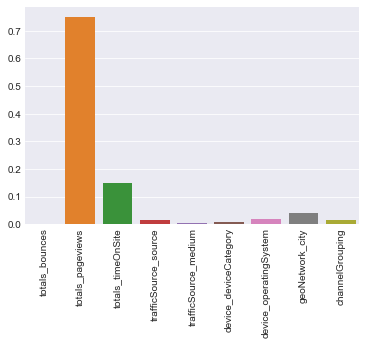

In [40]:
#Plotting feature importance for decision tree model - dtree_up
print("The important features of dtree_up are {}".format(dtree_up.feature_importances_))
sns.barplot(x_train_up.columns, dtree_up.feature_importances_)
plt.xticks(rotation=90)
plt.show()

*Conclusion-*
 
1. As total_pageview and total_time on site are two most imp important features based on the rules. 
2. But we will keep trying to increasing features and build model and find the optimal no of features.

In [41]:
#increasing features and finding optimal features.
x_tr= x_train_up[['totals_pageviews', 'totals_timeOnSite', 'geoNetwork_city', 'channelGrouping', 'device_deviceCategory']]
x_te= x_test_up[['totals_pageviews', 'totals_timeOnSite', 'geoNetwork_city','channelGrouping','device_deviceCategory']]

#Shape of data
print('The shape of x_tr is {}'.format(x_tr.shape))
print('The shape of x_te is {}'.format(x_te.shape))
print('The shape of y_train_up is {}'.format(y_train_up.shape))
print('The shape of y_test_up is {}'.format(y_test_up.shape))

#Decision tree model building
from sklearn.tree import DecisionTreeClassifier
dtree1= DecisionTreeClassifier(criterion='entropy', random_state=1)
dtree1.fit(x_tr, y_train_up)

The shape of x_tr is (458396, 5)
The shape of x_te is (114599, 5)
The shape of y_train_up is (458396,)
The shape of y_test_up is (114599,)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [42]:
#Checking model accuracy using - confusion matrix, accuracy score and classification report.
from sklearn import metrics
print("Confusion matrix for dtree1 model :")
print(metrics.confusion_matrix(y_test_up, dtree1.predict(x_te)))
print('\n')
print("The accuracy of the model dtree1 is {}".format(sklearn.metrics.accuracy_score(y_test_up, dtree1.predict(x_te))))
print('\n')
print("Classification report for dtree_up model :")
print(metrics.classification_report(y_test_up, dtree1.predict(x_te)))

Confusion matrix for dtree1 model :
[[90401  1091]
 [    2 23105]]


The accuracy of the model dtree1 is 0.9904623949598164


Classification report for dtree_up model :
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     91492
          1       0.95      1.00      0.98     23107

avg / total       0.99      0.99      0.99    114599



# K Fold crossvalidation

In [43]:
#Checking the cross validation score for the the model dtree1
from sklearn.cross_validation import cross_val_score

In [44]:
cvs_score= cross_val_score(DecisionTreeClassifier(criterion='entropy'), X_up, Y_up, cv=10)

In [45]:
#CVS scores
print("All crossvalidation scores are {}".format(cvs_score))
print('\n')
print("The mean accuracy for the model is {}".format(cvs_score.mean()))

All crossvalidation scores are [0.99186736 0.99169284 0.99184991 0.99219895 0.99204188 0.99186736
 0.99134365 0.99200684 0.99184977 0.99136096]


The mean accuracy for the model is 0.9918079544889622


*Final Conclusion-*

1. The dataset (Google Merchandise store) is a realtime dataset which has around 4.6 lakh data for customer buying behaviour of their products
2. We have 17 columns in the dataset but some of them are unnecessary columns.
3. The important columns that we have identified after EDA are 'totals_bounces','totals_pageviews','totals_timeOnSite','trafficSource_source', 'trafficSource_medium', 'device_deviceCategory' 'device_operatingSystem', 'geoNetwork_city', 'channelGrouping'.
4. The decision tree model (dtree) is build on train dataset using these columns but it came out that data is very unbalanced. Although the accuracy was high but the recall for class 1 came out to be very low.
5. So we upampled the minority dataset and built another decision tree model(dtree_up). The new accuracy was good and the recall for class 1 increased to 0.99. This model was build taking all the 9 features.
6. The important features were checked based on the rules of dtree_up and it came out that only 5 features are most important out of 9.They are 'totals_pageviews', 'totals_timeOnSite', 'geoNetwork_city', 'channelGrouping', 'device_deviceCategory'
7. So a model(dtree1) is built taking these 5 features.The accuracy came out to be 99% and recall/precision for both the classes are good. 
8. Based on the k fold crossvalidation the overall accuracy for dtree1 model came out is 0.9919. 